In [1]:
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Class 15: Real and Nominal Business Cycle Data

In this notebook, we will briefly explore US macroeconomic data suggesting that, contrary to the assumptions of most RBC models, there is in fact a relationship between real and nominal quantities over the business cycle. We will estimate an aggregate supply equation for the US and a monetary policy rule for the FOMC.

## Data

The file `business_cycle_data_actual_trend_cycle.csv`, available at https://raw.githubusercontent.com/letsgoexploring/economic-data/master/business-cycle-data/csv/business_cycle_data_actual_trend_cycle.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, real physical capital per capita, TFP, hours per capita, the rea money supply (M2), (nominal) interest rate on 3-month T-bills, the PCE inflation rate, and the unemployment rate; each at quarterly frequency. The GDP, consumption, investment, capital, and money supply data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100.

In [2]:
# Read business_cycle_data_actual_trend.csv into a Pandas DataFrame with the first column set as the index and parse_dates=True. CELL PROVIDED
data = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/business-cycle-data/csv/business_cycle_data_actual_trend_cycle.csv',index_col=0,parse_dates=True)

# Display the last five rows of the data
display(data.tail())

,gdp,gdp_trend,gdp_cycle,consumption,consumption_trend,consumption_cycle,investment,investment_trend,investment_cycle,hours,...,real_m2_cycle,t_bill_3mo,t_bill_3mo_trend,t_bill_3mo_cycle,pce_inflation,pce_inflation_trend,pce_inflation_cycle,unemployment,unemployment_trend,unemployment_cycle
date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,86.575596,86.088360,0.005644,58.726202,58.546648,0.003062,15.806890,15.609496,0.012566,99.880550,...,-0.036124,0.052433,0.042264,0.010169,0.025736,0.035247,-0.009511,0.040000,0.040543,-0.000543
2024-07-01,87.035406,86.471938,0.006495,59.075881,58.836808,0.004055,15.837276,15.682408,0.009827,99.836674,...,-0.030408,0.049900,0.044308,0.005592,0.022846,0.034329,-0.011483,0.041667,0.040025,0.001641
2024-10-01,87.367543,86.854500,0.005890,59.536988,59.126572,0.006917,15.545295,15.754909,-0.013394,99.821634,...,-0.024528,0.044000,0.046303,-0.002303,0.024679,0.033382,-0.008703,0.041333,0.039529,0.001805
2025-01-01,86.174068,87.236939,-0.012259,58.849767,59.416481,-0.009584,16.093817,15.827276,0.016700,98.879241,...,-0.033544,0.042100,0.048264,-0.006164,0.025256,0.032422,-0.007166,0.041000,0.039045,0.001955
2025-04-01,86.703564,87.620486,-0.010520,58.967677,59.707346,-0.012466,15.397308,15.899656,-0.032105,98.948054,...,-0.021718,0.042300,0.050208,-0.007908,0.023946,0.031457,-0.007510,0.041667,0.038569,0.003098


### Exercise: GDP and Inflation

Construct a plot of the cyclical components of GDP and inflation. 

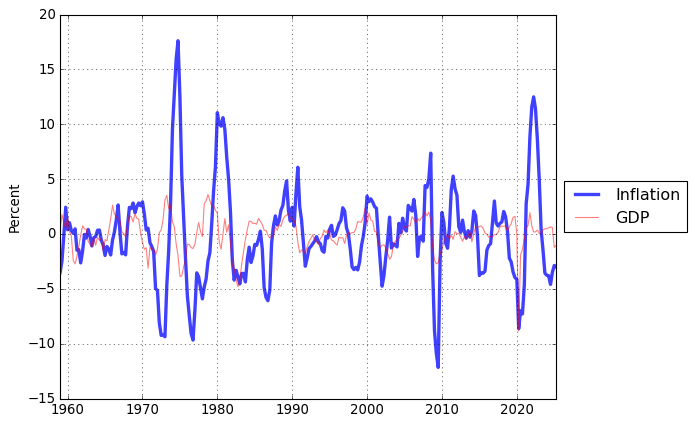

In [3]:
# Construct plot. CELL PROVIDED
plt.plot(data['pce_inflation_cycle']*400,alpha=0.75,lw=3,label='Inflation')
plt.plot(data['gdp_cycle']*100,c='r',alpha=0.5,label='GDP')

# Y-axis label
plt.ylabel('Percent')

# Grid
plt.grid()

# Place legend to right of figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Exercise: GDP and the 3-Month T-Bill Rate

Construct a plot of the cyclical components of GDP and the 3-month T-bill rate. 

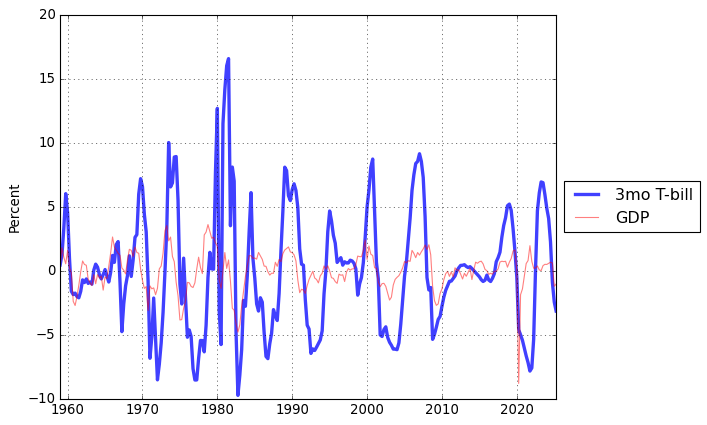

In [4]:
# Construct plot. CELL PROVIDED
plt.plot(data['t_bill_3mo_cycle']*400,alpha=0.75,lw=3,label='3mo T-bill')
plt.plot(data['gdp_cycle']*100,c='r',alpha=0.5,label='GDP')

# Y-axis label
plt.ylabel('Percent')

# Grid
plt.grid()

# Place legend to right of figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Standard Deviations and Correlations Between GDP, Inflation, and 3-Month T-Bill Rate

Compute the standard deviations of GDP, inflation, and the 3-month T-bill rate.

In [5]:
# Compute standard deviations (times 100). CELL PROVIDED
data[['gdp_cycle','pce_inflation_cycle','t_bill_3mo_cycle']].std()*100

gdp_cycle              1.488788
pce_inflation_cycle    1.073449
t_bill_3mo_cycle       1.177453
dtype: float64

Quarterly fluctuations of each series are of the order of 1 to 1.5 percent away from trend.

Next, compute the coefficients of corrrelation between GDP, inflation, and the 3-month T-bill rate.

In [6]:
# Compute correlation coefficients. CELL PROVIDED
data[['gdp_cycle','pce_inflation_cycle','t_bill_3mo_cycle']].corr()

,gdp_cycle,pce_inflation_cycle,t_bill_3mo_cycle
gdp_cycle,1.000000,0.182041,0.384931
pce_inflation_cycle,0.182041,1.000000,0.447538
t_bill_3mo_cycle,0.384931,0.447538,1.000000


Positive correlations between GDP and inflation and GDP and the T-bill rate suggest link between nominal and real quantities over the business cycle that should be exaplined by business cycle theory.

## Taylor's Monetary Policy Rule

Central banks in many countries set monetary policy with at least some autonomy. In the US, the Federal Reserve has broad discretion to decide how to manage its federal funds rate target in response to changes in the economy. The Federal Open Market Committee (FOMC), the monetary policymaking body within the Fed, comprises members of the Board of Governors and a rotating group of presidents from five of the regional Federal Reserve Banks.

The members of the FOMC can vote to set policy how they like and the composition of the FOMC changes regularly. So it might seem that modeling the decisionmaking of the FOMC would not be possible; that all monetary policy decisions are exogenous. But in fact, evidence shows that the FOMC does behave in a remarkably systematic way.

In his article "Discretion versus policy rules in practice" in the December 1993 issue of the *Carnegie-Rochester Conference Series on Public Policy*, John Taylor shows that monetary policy in the US could be approximated by a simple linear equation. (link to article: https://www.sciencedirect.com/science/article/pii/016722319390009L). His equation is:

\begin{align}
\text{Federal funds rate} & = \text{Inflation} + 0.5\cdot \text{Output gap} + 0.5\cdot(\text{Inflation - 2}) + 2,
\end{align}

where *inflation* is the percent change in the GDP deflator over the previous year and *output gap* is the percent deviation of GDP from a "target rate". Taylor assumed a target rate consistent with a constant growth GDP path of 2.2%. Note that the coefficients on inflation sum to 1.5.

You can see how well Taylor's rule fit the data as of 1993 in this figure from his paper:

<br>

<div align="center">
 <figure style="display: table">
   <img src="https://raw.githubusercontent.com/letsgoexploring/econ126/master/Img/external_fig_16_Rules_v_Discretion_Taylor_Fig1.png" width="50%" height="50%"> 
  <figcaption style="display: table-caption; caption-side: top; text-align: center;" >Figure 1. <strong>Taylor's rule and the actual federal funds rate.</strong> Source: Taylor (1993)</figcaption>
</figure> 
</div>

<br>

Taylor doesn't estimate his equation precisely and it's remarkable that such a simple linear equation would even come close to matching policy. In this example, we will gather data to replicate Taylor's rule and estimate his rule using OLS.

### Federal Funds Rate

The federal funds are is the interest rate on overnight interbank loans. The FOMC sets a taget for the fed funds rate and implements monetary policy so that the actual (or *effective*) federal unds rate equals the FOMS's target. The effective federal funds rate has FRED series ID `FEDFUNDS` and is available here: https://fred.stlouisfed.org/series/FEDFUNDS.

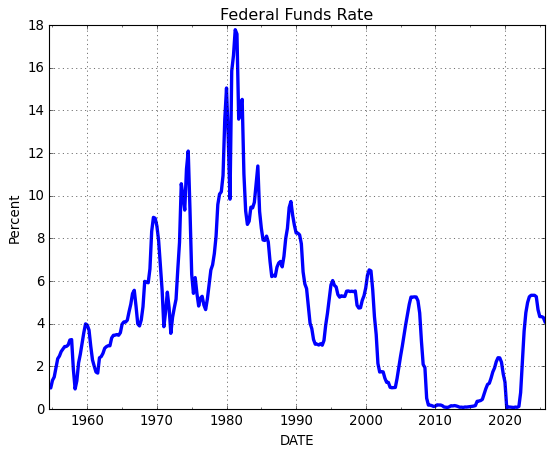

In [7]:
# Import federal funds rate data from FRED. PROVIDED
fed_funds = pd.read_html('https://fred.stlouisfed.org/data/FEDFUNDS',index_col=0)[-1]['VALUE']

# Parse the dates in the index. PROVIDED
fed_funds.index= pd.DatetimeIndex(fed_funds.index)

# Use `.resample('QS').mean()` method of `fed_funds` to convert the fed funds data from monthdy to quarterly
fed_funds = fed_funds.resample('QS').mean()

# Plot the federal funds rate data and set the title and the y-axis label. PROVIDED
fed_funds.plot(lw=3,title='Federal Funds Rate',ylabel='Percent')

# Grid. PROVIDED
plt.grid()

# Inflation

Taylor computes the inflation rate as the percent change in the GDP deflator from one year prior:

\begin{align}
\text{Inflation}_t = \frac{\text{GDP deflator}_t - \text{GDP deflator}_{t-4}}{\text{GDP deflator}_{t-4}}\cdot 100
\end{align}

The GDP deflator has FRED series ID `GDPDEF` and is available here: https://fred.stlouisfed.org/series/GDPDEF.

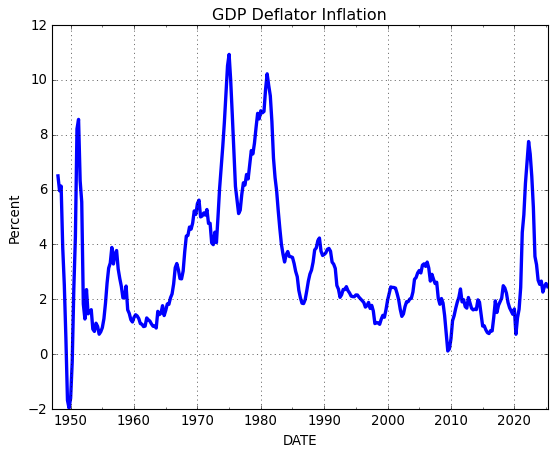

In [8]:
# Import GDP deflator data from FRED. PROVIDED
deflator = pd.read_html('https://fred.stlouisfed.org/data/GDPDEF',index_col=0)[1]['VALUE']

# Parse the dates in the index. PROVIDED
deflator.index= pd.DatetimeIndex(deflator.index)

# Compute the inflation rate
inflation = (deflator - deflator.shift(4))/deflator.shift(4)*100

# Plot the inflation rate data and set the title and y-axis label. PROVIDED
inflation.plot(lw=3,title = 'GDP Deflator Inflation',ylabel='Percent')

# Grid. PROVIDED
plt.grid()

### Output gap

The output gap is measured as the percent difference of real GDP from the CBO's estimate of the potential real GDP:

\begin{align}
\text{Output gap} & = \left(\frac{\text{Real GDP}-\text{Real potential GDP}}{\text{Real potential GDP}}\right)\cdot 100
\end{align}

Real GDP has FRED series ID `GDPC1` and is available here: https://fred.stlouisfed.org/series/GDPC1.

In [9]:
# Import GDP deflator data from FRED. PROVIDED
gdp_actual = pd.read_html('https://fred.stlouisfed.org/data/GDPC1',index_col=0)[1]['VALUE']

# Parse the dates in the index. PROVIDED
gdp_actual.index= pd.DatetimeIndex(gdp_actual.index)

Potential real GDP has FRED series ID `GDPPOT` and is available here: https://fred.stlouisfed.org/series/GDPPOT. Notice that there are 12 lines of text *before* the line starting with "DATE".

In [10]:
# Import GDP deflator data from FRED. PROVIDED
gdp_potential = pd.read_html('https://fred.stlouisfed.org/data/GDPPOT',index_col=0)[1]['VALUE']

# Parse the dates in the index. PROVIDED
gdp_potential.index= pd.DatetimeIndex(gdp_potential.index)

The real GDP data is released by the Bureau of Economic Analysis and the potential real GDP data is produced by the Congressional Budget Office (CBO). Since the data are released by different entities, the base year for each series can be different, making the series not directly comparable. To fix this, we will multiply the potential real GDP data by the average value of the GDP deflator in the BEA's base year and divide by the average value of the GDP deflator in the CBO's base year.

\begin{align}
\text{Real potential GDP [adjusted base year]} = \text{Real potential GDP [original data]} \cdot \left( \frac{\text{GDP deflator [BEA base year]}}{\text{GDP deflator [CBO base year]}}\right)
\end{align}


The code in the next cell uses `pd.read_html()` to parse the metadata for each GDP series. For each series, the units are in the form of:

    'Billions of Chained 2017 Dollars'
    
The base year is extracted by splitting the string on the single space character and taking the second-to-last element:

    'Billions of Chained 2017 Dollars'.split()[-2]
    
which, in the example, returns `'2017'` as the base year.

In [11]:
# Find the base years for acutal and potential real GDP data. CELL PROVIDED
base_year_bea = pd.read_html('https://fred.stlouisfed.org/data/GDPC1',index_col=0)[0][1].loc['Units'].split()[-2]
base_year_cbo = pd.read_html('https://fred.stlouisfed.org/data/GDPPOT',index_col=0)[0][1].loc['Units'].split()[-2]

print('Actual GDP base year:   ',base_year_bea)
print('Potential GDP base year:',base_year_cbo)

Actual GDP base year:    2017
Potential GDP base year: 2017


Next, import GDP deflator data and make the adjustment to potential real GDP.

In [12]:
# Import GDP deflator data from FRED. CELL PROVIDED
gdp_deflator = pd.read_html('https://fred.stlouisfed.org/data/GDPDEF',index_col=0)[1]['VALUE']

# Parse the dates in the index. PROVIDED
gdp_deflator.index= pd.DatetimeIndex(gdp_deflator.index)

# Scale potential GDP data by ratio of GDP deflator for base year used by the BEA to GDP deflator
# for base year used by the CBO
gdp_potential = gdp_potential*gdp_deflator.loc[base_year_bea].mean()/gdp_deflator.loc[base_year_cbo].mean()

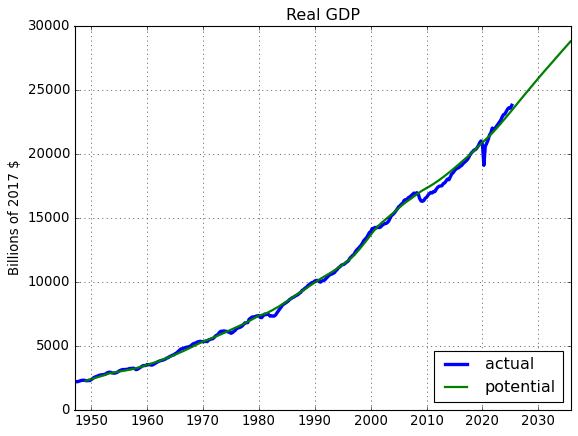

In [13]:
# Plot the actual and potential real GDP data with a legend. CELL PROVIDED
plt.plot(gdp_actual,label='actual',lw=3)
plt.plot(gdp_potential,label='potential',lw=2)
plt.legend(loc='lower right')
plt.title('Real GDP')
plt.ylabel('Billions of '+base_year_bea+' $')
plt.grid()

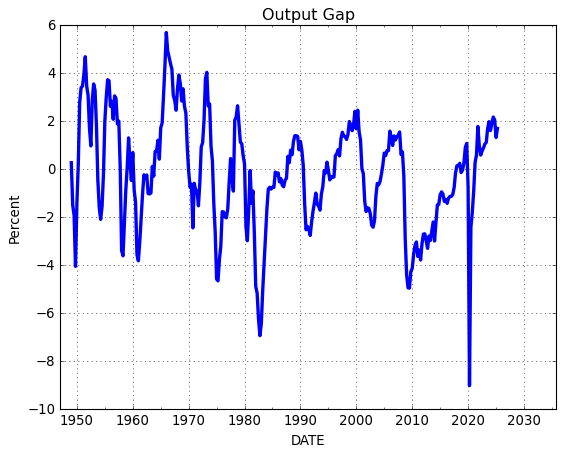

In [14]:
# Construct an output gap variable and plot
output_gap = (gdp_actual - gdp_potential)/gdp_potential*100

# Plot the output gap and set the title and the y-axis label. PROVIDED
output_gap.plot(lw=3,title='Output Gap',ylabel='Percent')

# Grid. PROVIDED
plt.grid()

### Combine Data into a DataFrame

In [15]:
# Create variable `df` that is a DataFrame storing fed funds, inflation, and the output gap
df = pd.DataFrame({
    'fed_funds':fed_funds,
    'inflation':inflation,
    'output_gap':output_gap,
})

# Drop missing values from `df`
df = df.dropna()

# Display df
display(df)

,fed_funds,inflation,output_gap
DATE,,,
1954-07-01,1.030000,0.727219,-1.570996
1954-10-01,0.986667,0.814754,-0.255623
1955-01-01,1.343333,0.967218,1.983082
1955-04-01,1.500000,1.290941,2.980351
1955-07-01,1.940000,1.863857,3.720764
...,...,...,...
2024-04-01,5.330000,2.663222,1.910899
2024-07-01,5.263333,2.263371,2.163714
2024-10-01,4.650000,2.467485,2.047311


Recall Taylor's rule:

\begin{align}
\text{Federal funds rate} & = \text{Inflation} + 0.5\cdot \text{Output gap} + 0.5\cdot(\text{Inflation - 2}) + 2
\end{align}

In [16]:
# Construct a column called 'taylor' that implements Taylor's rule
df['taylor'] = df['inflation'] + 0.5*df['output_gap'] + 0.5*(df['inflation']-2)+2

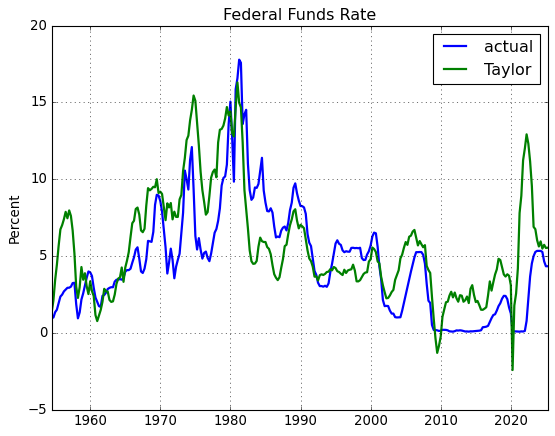

In [17]:
# Plot actual federal funds rate and the federal funds rate implied by Taylor's rule. CELL PROVIDED
plt.plot(df['fed_funds'],label='actual',lw=2)
plt.plot(df['taylor'],label='Taylor',lw=2)
plt.title('Federal Funds Rate')
plt.ylabel('Percent')
plt.legend()
plt.grid()

### OLS Model of the FOMC's Monetary Policy Rule

Following the format suggested by Taylor's rule, we'll estimate the following monetary policy rule for the US:

\begin{align}
\hat{i}_t & = \bar{\imath} + \phi_{\pi}\pi_t + \phi_{y} y_t + \epsilon_t
\end{align}

where $\pi_t$ is the percent change in the GDP deflator over the previous year and $y_t$ is the output gap measured as the percent difference of real GDP from the CBO's estimate of the potential real GDP. $\phi_{\pi}$ is the weight that the FOMC places on inflation in the rule and $\phi_{y}$ is the weight that the central bank places on the output gap. $\epsilon_t$ is the residual of the regression. 

In [18]:
# Import statsmodels.api
import statsmodels.api as sm

# Create variable 'X' with columns inflation, output and a constant
X = sm.add_constant(df[['inflation','output_gap']])

# Create variable 'Y' equal to the federal funds rate
Y = df['fed_funds']

# Initialize OLS model
model = sm.OLS(Y,X)

# Fit OLS model
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              fed_funds   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     134.3
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.16e-41
Time:                        12:07:37   Log-Likelihood:                -666.02
No. Observations:                 284   AIC:                             1338.
Df Residuals:                     281   BIC:                             1349.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1430      0.266      4.294      0.0

The estimated constant in the regression is about 0.94 compared with 1 in Taylor's rule. The estimated coefficnets on inflation and the output gap are 1.09 and 0.13 compared with 1.5 and 0.5 in Taylor's rule. All three parameter estimates are remarkably close to Taylor's proposal. It's amazing that his rule still preforms will after almost 30 years.

Note, Taylor doens't argue that his rule is *optimal* in the sense that it is the best way for the FOMC to meet it's objectives. But there is evidence that it is actually very close to an optimal rule and therefore evidence that the FOMC does in fact tend to make good policy decisions.

In [19]:
# Add column 'fed_funds_predicted' to df equal to predicted fed funds rate values from regression
df['fed_funds_predicted'] = results.predict()

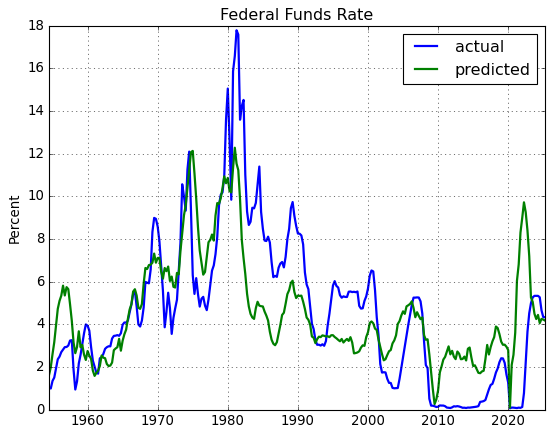

In [20]:
# Plot actual federal funds rate and the predicted federal funds. CELL PROVIDED
plt.plot(df['fed_funds'],label='actual',lw=2)
plt.plot(df['fed_funds_predicted'],label='predicted',lw=2)
plt.title('Federal Funds Rate')
plt.ylabel('Percent')
plt.legend()
plt.grid()